In [51]:
#Step-1: Reading the data which was saved before

import pandas as pd

df=pd.read_csv(r'~/Desktop/HealthCare_Insurance_Segmentation/Datasets/FE_data.csv')



In [52]:
#Step-2: Train and Test Split

from sklearn.model_selection import train_test_split
import numpy as np

X=df.iloc[:,0:-1]
Y=df["Renewal"]

In [53]:
#Considering the 30% for test dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

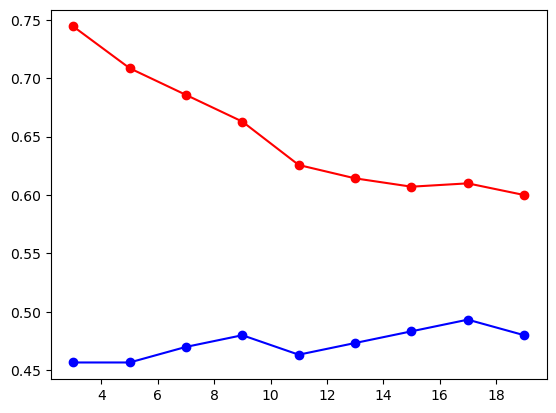

In [54]:
########################################################
#################### Shallow Models ####################

##### KNN 

#Selection of "K" Value
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc=[]
for i in range(3,21,2):
    knn= KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
    train_acc = accuracy_score(knn.predict(X_train),Y_train)
    test_acc = accuracy_score(knn.predict(X_test),Y_test)
    acc.append([train_acc, test_acc])
    
#Checking the right fit for "K" value
# train accuracy plot 
plt.plot(np.arange(3,21,2),[i[0] for i in acc],"ro-")
# test accuracy plot
plt.plot(np.arange(3,21,2),[i[1] for i in acc],"bo-")

In [55]:
#Selecting the K=9 from the graph
knn= KNeighborsClassifier(n_neighbors=9).fit(X_train,Y_train)

In [56]:
# Evaluation on Training Data
print(confusion_matrix(Y_train, knn.predict(X_train)))
knn_train_acc = accuracy_score(knn.predict(X_train),Y_train)
print("K-Nearest Neighour Train Accuracy: ","{:.2%}".format(knn_train_acc))
knn_train_f1 = f1_score(knn.predict(X_train),Y_train)

[[211 130]
 [106 253]]
K-Nearest Neighour Train Accuracy:  66.29%


In [57]:
# Evaluation on Testing Data
print(confusion_matrix(Y_test,knn.predict(X_test)))
knn_test_acc = accuracy_score(knn.predict(X_test),Y_test)
print("K-Nearest Neighour Test Accuracy: ","{:.2%}".format(knn_test_acc))
knn_test_f1 = f1_score(knn.predict(X_test),Y_test)

[[66 83]
 [73 78]]
K-Nearest Neighour Test Accuracy:  48.00%


In [58]:
##### Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB().fit(X_train,Y_train)

# Evaluation on Training Data
print(confusion_matrix(Y_train, nb.predict(X_train)))
nb_train_acc = accuracy_score(nb.predict(X_train),Y_train)
print("Naive Bayes Train Accuracy: ","{:.2%}".format(nb_train_acc))
nb_train_f1 = f1_score(nb.predict(X_train),Y_train)

# Evaluation on Testing Data
print(confusion_matrix(Y_test,nb.predict(X_test)))
nb_test_acc = accuracy_score(nb.predict(X_test),Y_test)
print("Naive Bayes Test Accuracy: ","{:.2%}".format(nb_test_acc))
nb_test_f1 = f1_score(nb.predict(X_test),Y_test)

[[139 202]
 [121 238]]
Naive Bayes Train Accuracy:  53.86%
[[ 53  96]
 [ 49 102]]
Naive Bayes Test Accuracy:  51.67%


In [59]:
##### Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier().fit(X_train,Y_train)

# Evaluation on Training Data
print(confusion_matrix(Y_train, dtc.predict(X_train)))
dtc_train_acc = accuracy_score(dtc.predict(X_train),Y_train)
print("Decision Tree Train Accuracy: ","{:.2%}".format(dtc_train_acc))
dtc_train_f1 = f1_score(dtc.predict(X_train),Y_train)

# Evaluation on Testing Data
print(confusion_matrix(Y_test,dtc.predict(X_test)))
dtc_test_acc = accuracy_score(dtc.predict(X_test),Y_test)
print("Decision Tree Test Accuracy: ","{:.2%}".format(dtc_test_acc))
dtc_test_f1 = f1_score(dtc.predict(X_test),Y_test)


[[341   0]
 [  0 359]]
Decision Tree Train Accuracy:  100.00%
[[70 79]
 [61 90]]
Decision Tree Test Accuracy:  53.33%


In [60]:
#############################################################
#################### Logistic Regression ####################

from sklearn.linear_model import LogisticRegression

logit=LogisticRegression().fit(X_train,Y_train)

# Evaluation on Training Data
print(confusion_matrix(Y_train, logit.predict(X_train)))
logit_train_acc = accuracy_score(logit.predict(X_train),Y_train)
print("Logistic Regression Train Accuracy: ","{:.2%}".format(logit_train_acc))
logit_train_f1 = f1_score(logit.predict(X_train),Y_train)

# Evaluation on Testing Data
print(confusion_matrix(Y_test,logit.predict(X_test)))
logit_test_acc = accuracy_score(logit.predict(X_test),Y_test)
print("Logistic Regression Test Accuracy: ","{:.2%}".format(logit_test_acc))
logit_test_f1 = f1_score(logit.predict(X_test),Y_test)

[[  7 334]
 [  7 352]]
Logistic Regression Train Accuracy:  51.29%
[[  3 146]
 [  4 147]]
Logistic Regression Test Accuracy:  50.00%


In [61]:
#############################################################
#################### Black Box Technique #################### 

##### SVM  
from sklearn.svm import SVC

bb=SVC(kernel="rbf").fit(X_train,Y_train)

# Evaluation on Training Data
print(confusion_matrix(Y_train, bb.predict(X_train)))
bb_train_acc = accuracy_score(bb.predict(X_train),Y_train)
print("Support  Vector Machine Train Accuracy: ","{:.2%}".format(bb_train_acc))
bb_train_f1 = f1_score(bb.predict(X_train),Y_train)

# Evaluation on Testing Data
print(confusion_matrix(Y_test,bb.predict(X_test)))
bb_test_acc = accuracy_score(bb.predict(X_test),Y_test)
print("Support Vector Machine Test Accuracy: ","{:.2%}".format(bb_test_acc))
bb_test_f1 = f1_score(bb.predict(X_test),Y_test)

[[  0 341]
 [  0 359]]
Support  Vector Machine Train Accuracy:  51.29%
[[  0 149]
 [  0 151]]
Support Vector Machine Test Accuracy:  50.33%


In [68]:
##### Neural Network - MLP
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense
import numpy as np


np.random.seed(10)

from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size = 0.20,random_state=0)

x_train = train.iloc[:,0:25].values
x_test = test.iloc[:,0:25].values
y_train = train.Renewal.values
y_test = test.Renewal.values

In [69]:
# Normalizing the inputs to fall under 0-1 
from sklearn.preprocessing import scale

x_train = scale(x_train)
x_test = scale(x_test)

# one hot encoding outputs for both train and test data sets 
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# Storing the number of classes into the variable num_of_classes 
y_test.shape
num_of_classes = y_test.shape[1]
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(200, 2)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def design_mlp(num_of_classes, input_dim=25):
    # Initializing the model
    model = Sequential()
    model.add(Dense(100, input_dim=input_dim, activation="relu"))
    model.add(Dense(200, activation="tanh"))
    model.add(Dense(300, activation="tanh"))
    model.add(Dense(500, activation="tanh"))
    model.add(Dense(num_of_classes, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [77]:
import keras.backend as K
##building a cnn model using train data set and validating on test data set
ann = design_mlp()
ann.fit(x=x_train,y=y_train,batch_size=20,epochs=10)

# Evaluation on Training Data
ann_train_acc = ann.evaluate(x_train,y_train,verbose=1)
print ("ANN Train Accuracy: %.2f%%" %(ann_train_acc[1]*100)) 
ann_train_f1= 0

# Evaluation on Testing Data
ann_test_acc = ann.evaluate(x_test,y_test,verbose = 1)
print ("ANN Test Accuracy: %.2f%%" %(ann_test_acc[1]*100)) 
ann_test_f1= 0

TypeError: design_mlp() missing 1 required positional argument: 'num_of_classes'

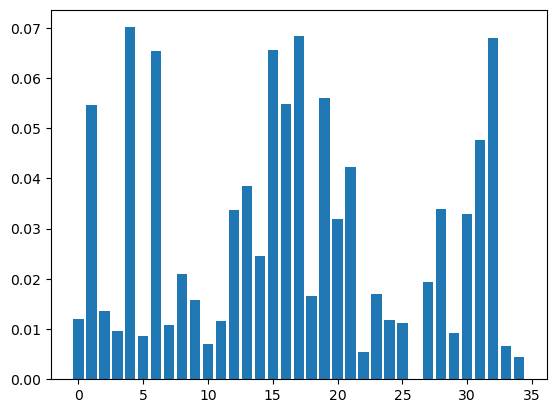

[[341   0]
 [  0 359]]
Random Forest Train Accuracy:  100.00%
[[66 83]
 [61 90]]
Random Forest Test Accuracy:  52.00%


In [78]:
##### Random Forest
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=500,criterion="entropy").fit(X_train,Y_train)
important_features=rfc.feature_importances_
important=[]
values=[]
for i,v in enumerate(important_features):
    e=df.columns[i]
    important.append(e)
    values.append(v)
features_selection=pd.DataFrame({"Feature":important,"Importance_Value":values})
features_selection.sort_values(by="Importance_Value",ascending=False,inplace=True)

# plot feature importance
pyplot.bar([x for x in range(len(important_features))], important_features)
pyplot.show()
# Evaluation on Training Data
print(confusion_matrix(Y_train, rfc.predict(X_train)))
rfc_train_acc = accuracy_score(rfc.predict(X_train),Y_train)
print("Random Forest Train Accuracy: ","{:.2%}".format(rfc_train_acc))
rfc_train_f1 = f1_score(rfc.predict(X_train),Y_train)
# Evaluation on Testing Data
print(confusion_matrix(Y_test,rfc.predict(X_test)))
rfc_test_acc = accuracy_score(rfc.predict(X_test),Y_test)
print("Random Forest Test Accuracy: ","{:.2%}".format(rfc_test_acc))
rfc_test_f1 = f1_score(rfc.predict(X_test),Y_test)

In [79]:
##### Ada Boost

from sklearn.ensemble import AdaBoostClassifier

a=RandomForestClassifier()
ad=AdaBoostClassifier(base_estimator=a,n_estimators=100,learning_rate=0.2).fit(X_train,Y_train)

# Evaluation on Training Data
print(confusion_matrix(Y_train, ad.predict(X_train)))
ad_train_acc = accuracy_score(ad.predict(X_train),Y_train)
print("Ada Boost Train Accuracy: ","{:.2%}".format(ad_train_acc))
ad_train_f1 = f1_score(ad.predict(X_train),Y_train)

# Evaluation on Testing Data
print(confusion_matrix(Y_test,ad.predict(X_test)))
ad_test_acc = accuracy_score(ad.predict(X_test),Y_test)
print("Ada Boost Test Accuracy: ","{:.2%}".format(ad_test_acc))
ad_test_f1 = f1_score(ad.predict(X_test),Y_test)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[[341   0]
 [  0 359]]
Ada Boost Train Accuracy:  100.00%
[[79 70]
 [66 85]]
Ada Boost Test Accuracy:  54.67%


In [80]:
##### XGBoost

import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depths = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1).fit(X_train,Y_train)

# Evaluation on Training Data
print(confusion_matrix(Y_train, xgb_clf.predict(X_train)))
xgb_clf_train_acc = accuracy_score(xgb_clf.predict(X_train),Y_train)
print("Extreme Gradient Boost Train Accuracy: ","{:.2%}".format(xgb_clf_train_acc))
xgb_clf_train_f1 = f1_score(xgb_clf.predict(X_train),Y_train)

# Evaluation on Testing Data
print(confusion_matrix(Y_test,xgb_clf.predict(X_test)))
xgb_clf_test_acc = accuracy_score(xgb_clf.predict(X_test),Y_test)
print("Extreme Gradient Boost Test Accuracy: ","{:.2%}".format(xgb_clf_test_acc))
xgb_clf_test_f1 = f1_score(xgb_clf.predict(X_test),Y_test)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:12:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depths" } are not used.

  warnings.warn(smsg, UserWarning)


[[341   0]
 [  0 359]]
Extreme Gradient Boost Train Accuracy:  100.00%
[[76 73]
 [64 87]]
Extreme Gradient Boost Test Accuracy:  54.33%


In [83]:
##### Stacking

from sklearn.ensemble import StackingClassifier

estimators = [('rf',SVC(kernel="rbf")),("lgr",LogisticRegression()),("dt",DecisionTreeClassifier())]

st_clf= StackingClassifier(estimators=estimators, final_estimator= RandomForestClassifier(n_estimators=500)).fit(X_train,Y_train)

# Evaluation on Training Data
print(confusion_matrix(Y_train, st_clf.predict(X_train)))
st_clf_train_acc = accuracy_score(st_clf.predict(X_train),Y_train)
print("Stacking Train Accuracy: ","{:.2%}".format(st_clf_train_acc))
st_clf_train_f1 = f1_score(st_clf.predict(X_train),Y_train)

# Evaluation on Testing Data
print(confusion_matrix(Y_test,st_clf.predict(X_test)))
st_clf_test_acc = accuracy_score(st_clf.predict(X_test),Y_test)
print("Stacking Test Accuracy: ","{:.2%}".format(st_clf_test_acc))
st_clf_test_f1 = f1_score(st_clf.predict(X_test),Y_test)

[[205 136]
 [159 200]]
Stacking Train Accuracy:  57.86%
[[79 70]
 [76 75]]
Stacking Test Accuracy:  51.33%


In [89]:
import pandas as pd

# Assuming placeholders -1 for missing values (Neural Network accuracies and F1 scores)
names = ["K-Nearest Neighbour", "Naive Bayes", "Decision Tree", "Logistic Regression", "Support Machine Vector", "Neural Network", "Random Forest", "Ada Boost", "Extreme Gradient Boost", "Stacking"]
train_accuracy = [knn_train_acc, nb_train_acc, dtc_train_acc, logit_train_acc, bb_train_acc, -1, rfc_train_acc, ad_train_acc, xgb_clf_train_acc, st_clf_train_acc]
test_accuracy = [knn_test_acc, nb_test_acc, dtc_test_acc, logit_test_acc, bb_test_acc, -1, rfc_test_acc, ad_test_acc, xgb_clf_test_acc, st_clf_test_acc]
train_f1 = [knn_train_f1, nb_train_f1, dtc_train_f1, logit_train_f1, bb_train_f1, -1, rfc_train_f1, ad_train_f1, xgb_clf_train_f1, st_clf_train_f1]
test_f1 = [knn_test_f1, nb_test_f1, dtc_test_f1, logit_test_f1, bb_test_f1, -1, rfc_test_f1, ad_test_f1, xgb_clf_test_f1, st_clf_test_f1]

# Creating DataFrame
Models = pd.DataFrame({
    "Models": names,
    "Accuracy of Train": train_accuracy,
    "Accuracy of Test": test_accuracy,
    "F1 Score of Train": train_f1,
    "F1 Score of Test": test_f1
})

# Convert percentages
Models["Accuracy of Train"] *= 100
Models["Accuracy of Test"] *= 100
Models["F1 Score of Train"] *= 100
Models["F1 Score of Test"] *= 100

print(Models)


                   Models  Accuracy of Train  Accuracy of Test  \
0     K-Nearest Neighbour          66.285714         48.000000   
1             Naive Bayes          53.857143         51.666667   
2           Decision Tree         100.000000         53.333333   
3     Logistic Regression          51.285714         50.000000   
4  Support Machine Vector          51.285714         50.333333   
5          Neural Network        -100.000000       -100.000000   
6           Random Forest         100.000000         52.000000   
7               Ada Boost         100.000000         54.666667   
8  Extreme Gradient Boost         100.000000         54.333333   
9                Stacking          57.857143         51.333333   

   F1 Score of Train  F1 Score of Test  
0          68.194070         50.000000  
1          59.574468         58.452722  
2         100.000000         56.250000  
3          67.368421         66.216216  
4          67.799811         66.962306  
5        -100.000000       

In [90]:
df.to_csv(r'~/Desktop/HealthCare_Insurance_Segmentation/Datasets/Models.csv', index=False)